### 앙상블
* 여러 머신러닝 모델을 더 강력한 모델을 만든다.
* 랜덤 포레스트 (random forest) 와 그래디언트 부스팅 (gradient boosting)

https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/overview

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd

train = pd.read_csv('./house_data/train.csv')
test = pd.read_csv('./house_data/test.csv')
sub = pd.read_csv('./house_data/sample_submission.csv')

In [10]:
pd.set_option('display.max_columns', None)

In [4]:
train.shape, test.shape, sub.shape

((15035, 21), (6555, 20), (6468, 2))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

In [8]:
print(train.columns)
print()
print(test.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [11]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [12]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15208,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1,15209,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
2,15210,20150124T000000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,15211,20141205T000000,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
4,15212,20140514T000000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980


In [13]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6555.000000,6555.000000,6555.000000,6555.000000,6.555000e+03,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000
mean,18485.000000,3.351640,2.093516,2064.500992,1.490303e+04,1.489016,0.008848,0.232342,3.414493,7.639969,1778.594813,285.906178,1970.349047,84.316095,98079.464226,47.561815,-122.215813,1980.380168,12291.057818
std,1892.409839,0.921588,0.776235,913.819665,4.144576e+04,0.539656,0.093655,0.766552,0.658600,1.173162,833.745769,437.225295,29.570353,401.445758,53.437620,0.137401,0.140111,699.981030,25520.455731
min,15208.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,750.000000
25%,16846.500000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.475100,-122.331000,1460.000000,5027.000000
50%,18485.000000,3.000000,2.250000,1880.000000,7.587000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98072.000000,47.572300,-122.236000,1820.000000,7591.000000
75%,20123.500000,4.000000,2.500000,2550.000000,1.063850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2180.000000,550.000000,1996.000000,0.000000,98118.000000,47.677500,-122.125000,2360.000000,10000.000000
max,21762.000000,9.000000,6.500000,7850.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [17]:
X_all = train.drop(['price'], axis=1)
y = train['price']

print(X_all.shape, y.shape)

(15035, 20) (15035,)


In [18]:
X_all.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


* 상관계수
    * -1 ~ 1 값의 범위를 갖는다
    * 절대값을 취해서 1에 가까울수록 상관관계가 높다.
    * price와 관련도가 

In [20]:
train.corr()['price']

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
zipcode         -0.051498
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
Name: price, dtype: float64

In [21]:
# bedrooms, bathrooms, sqft_living, view, grade

In [22]:
X_all.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade']
X = X_all[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11276, 5), (11276,), (3759, 5), (3759,))

In [26]:
# knn
model = KNeighborsRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6889315379646785
0.49202844461306783


In [27]:
# random forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8996169473384688
0.5661999192297682


In [34]:
# gradient boosting
from pandas import DataFrame


depth_list = list(range(1, 15))
lr_list = [0.1, 0.05, 0.01, 0.005, 0.001]

depth_lst = []
lr_lst = []
train_score = []
test_score = []

for d in depth_list:
    for lr in lr_list:
        model = GradientBoostingRegressor(
            max_depth=d,
            learning_rate=lr,
            random_state=0
        )
        model.fit(X_train, y_train)
        depth_lst.append(d)
        lr_lst.append(lr)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

data = {
    'depth': depth_lst,
    'lr': lr_lst,
    'train': train_score,
    'test': test_score
}
df = DataFrame(data)
df

,depth,lr,train,test
0,1,0.100,0.664409,0.621897
1,1,0.050,0.622277,0.590699
2,1,0.010,0.343832,0.363110
3,1,0.005,0.220421,0.239943
4,1,0.001,0.056450,0.062255
...,...,...,...,...
65,14,0.100,0.937690,0.463187
66,14,0.050,0.931867,0.475497
67,14,0.010,0.767319,0.492663
68,14,0.005,0.552237,0.383474


In [35]:
max_test = df.loc[df['test'] == df['test'].max()]
max_test

,depth,lr,train,test
15,4,0.1,0.741415,0.644277


In [37]:
model = GradientBoostingRegressor(max_depth=4, learning_rate=0.1, random_state=0).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7414152354839403
0.6442769393031508


In [38]:
model.feature_importances_

array([0.01238669, 0.04646947, 0.4004377 , 0.0622812 , 0.47842494])

In [39]:
model.n_features_

5

In [40]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도 
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정 

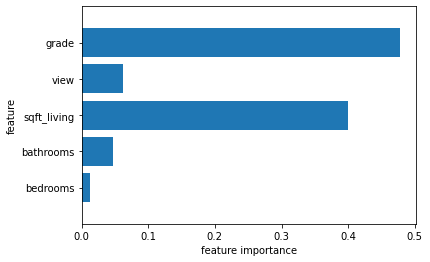

In [41]:
feature_names = sel   #  선택된 피처의 이름
n_features = X.shape[1]  # 선택된 피처의 개수
plot_feature_important_up(model, n_features, feature_names) # 피처의 중요도 확인